import libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


import data

In [63]:
#loading the data from the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
file_path='/content/drive/MyDrive/Loan status approval/loan status approval_dataset.csv'
df=pd.read_csv(file_path)

In [65]:
#printing the first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [66]:
#number of rows and columns
df.shape

(614, 13)

In [67]:
#statiscal measures for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [68]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
#dropping the missing values
df=df.dropna()

In [70]:
# check for missing values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [71]:
#label_encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [72]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [73]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
#check the unique values from each feature
columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for column in columns:
    print("---------------------------------------------------")
    print(df[column].value_counts())
    print("---------------------------------------------------")

---------------------------------------------------
Male      394
Female     86
Name: Gender, dtype: int64
---------------------------------------------------
---------------------------------------------------
Yes    311
No     169
Name: Married, dtype: int64
---------------------------------------------------
---------------------------------------------------
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
---------------------------------------------------
---------------------------------------------------
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
---------------------------------------------------
---------------------------------------------------
No     414
Yes     66
Name: Self_Employed, dtype: int64
---------------------------------------------------
---------------------------------------------------
1.0    410
0.0     70
Name: Credit_History, dtype: int64
---------------------------------------------------
-----------------

In [75]:
#replacing the value of 3+ as 4 for dependence column, using manual encoding
df.replace({"Dependents":{'3+':4}},inplace=True)

In [76]:
#checking if the values are replaced
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

##EDA

In [77]:
#split numeric and categorical columns
# listing the object columns
object_columns = [col for col in df.columns if df[col].dtype == 'object']
print(object_columns)
# listing the int/float columns
num_columns = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
print(num_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


**Univariate Analysis**

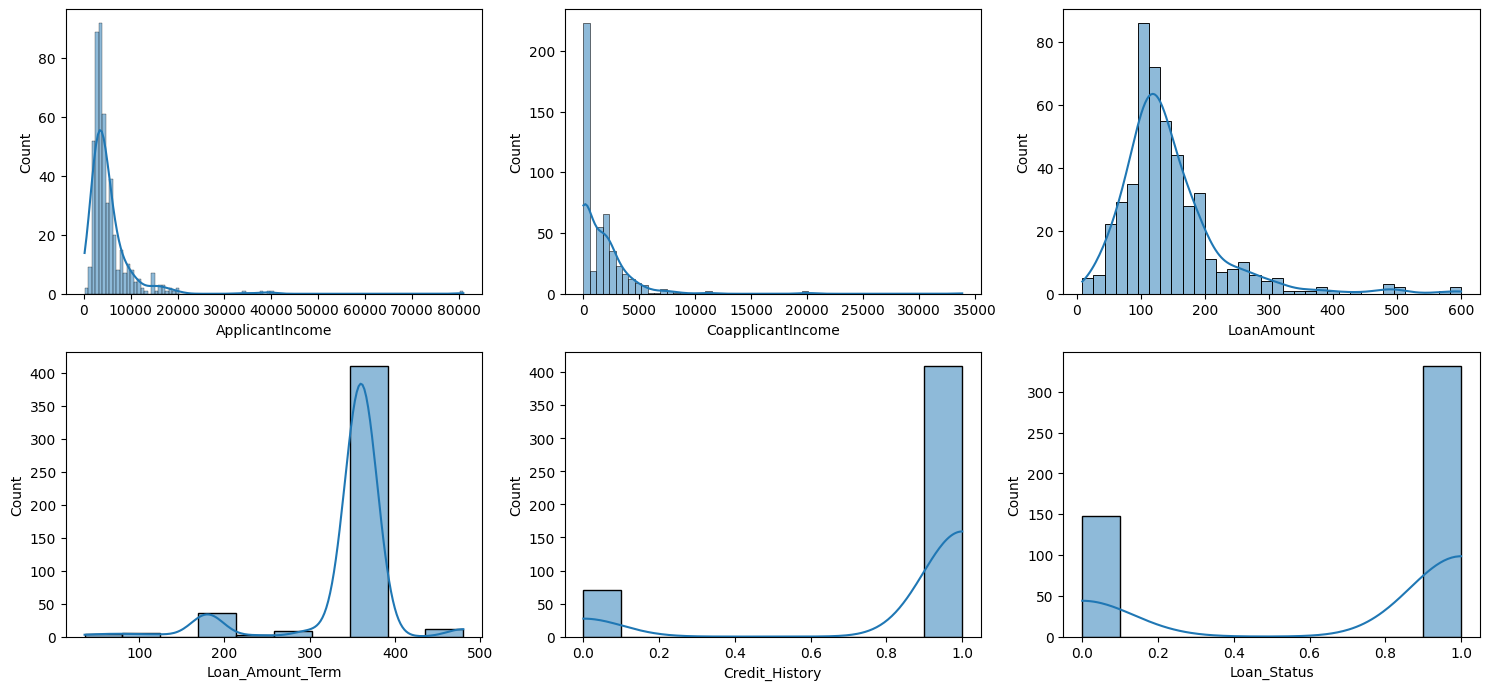

In [78]:
# Univariate Analysis for numerical columns
plt.figure(figsize=(15, 10), facecolor='white')

plotnumber = 1 # Counter
for column in num_columns:  # Assuming 'data' is a pandas DataFrame
    if plotnumber <= 11:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(x=df[column], kde=True)  # Using kde=True adds a kernel density estimate
        plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

**Insights:**


*   Applicant Income left skewed
*   Loan amount is left skewed
* Co-applicant Income is left skewed
* Loan_amount_Term is right skewed




**Bi-variate Analysis**

<Axes: xlabel='Education', ylabel='count'>

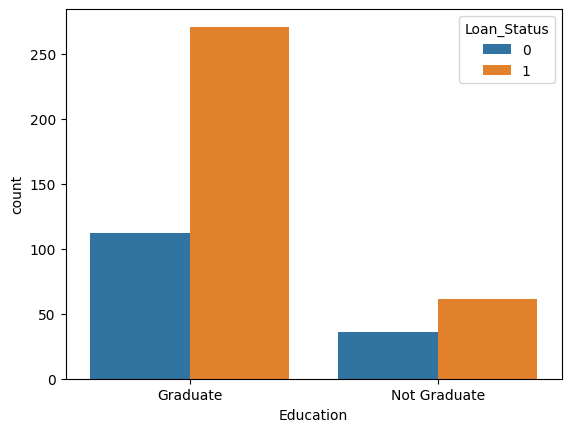

In [79]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

We have more approval while the individual is graduated

<Axes: xlabel='Married', ylabel='count'>

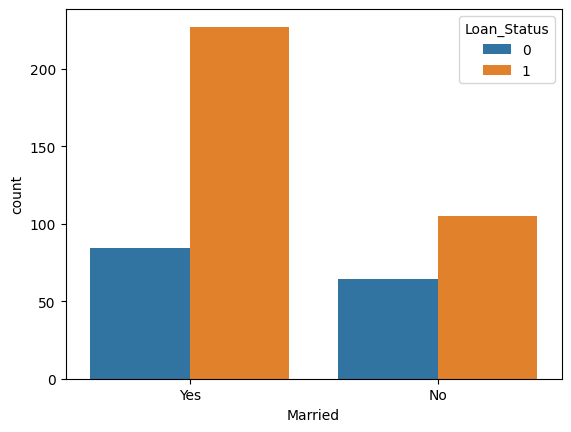

In [80]:
#marital status and loan_status
sns.countplot(x="Married",hue="Loan_Status",data=df)

Married people are getting more approvals compared to unmarried

##Data Preprocessing

convert categorical columns to numerical columns

In [81]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

Manual Encoding

In [82]:
#'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

#Manual Encoding

df['Gender']=df['Gender'].map({"Male":0,"Female":1})

In [83]:
df['Married']=df['Married'].map({'Yes':1,'No':0})

In [84]:
df['Education']=df['Education'].map({'Graduate':1,"Not Graduate":0})

In [85]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

In [86]:
df['Property_Area']=df['Property_Area'].map({"Semiurban":1,"Urban":2,"Rural":0})

Changing the Data type

In [87]:
df['Dependents']=df['Dependents'].astype(int)

Splitting the data into X and Y

In [88]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df.Loan_Status

In [89]:
X.shape

(480, 11)

In [90]:
Y.shape

(480,)

Train test split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [95]:
print(X.shape,
X_train.shape,
X_test.shape)


(480, 11) (384, 11) (96, 11)


Training the model
Support vector machine model implementation

In [97]:
classifier=svm.SVC(kernel='linear')


In [99]:
#training the support vector machine model
classifier.fit(X_train,y_train)


SVC(kernel='linear')

model evaluation

In [100]:
#accuracy score on training data
X_train_prediction=classifier.predict(X_train)

In [102]:
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [103]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.7890625


In [104]:
X_test_prediction=classifier.predict(X_test)

In [105]:
testing_data_accuracy=accuracy_score(X_test_prediction,y_test)


In [106]:
print("Accuracy on testing data:",testing_data_accuracy)

Accuracy on testing data: 0.8229166666666666
